Import The Libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Import the MNIST data.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print((X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape))


((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Training data = 60,000 images

Test data = 10,000 images

Image dim = 28x28

Display the image

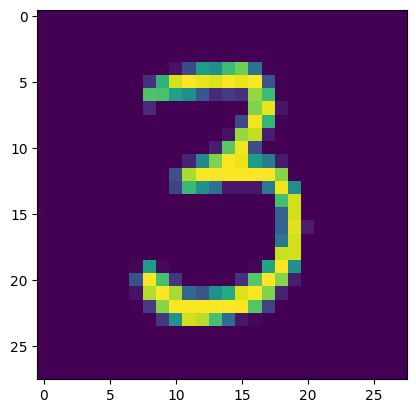

In [ ]:
plt.imshow(X_train[50])
plt.show()


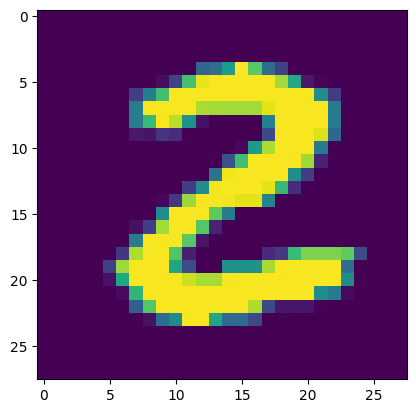

In [ ]:
plt.imshow(X_train[25])
plt.show()

In [ ]:

#Scaling the values.
X_train = X_train/255
X_test = X_test/255

Building The Neural Network.

In [ ]:
from keras.api._v2.keras import activations
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dense(50, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid'),
    ]
)


In [ ]:
#Compiling the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the Neural network model.
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2837 - accuracy: 0.9186
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.9602
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1012 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0823 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0382 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [ ]:
#Evalute the model.
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9740


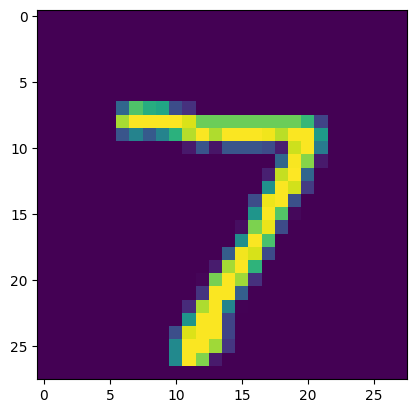

In [ ]:
#Print the first data in X_test.
plt.imshow(X_test[0])
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_pred[0])

[1.4848819e-04 8.7172776e-02 7.9602319e-01 9.6716380e-01 3.6352021e-06
 1.1799250e-03 8.0705382e-12 1.0000000e+00 1.0332726e-01 2.2819853e-01]


In [ ]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)


7


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

Confusion Matrix.

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 961    0    1    2    1    4    4    2    2    3]
 [   0 1121    2    3    0    0    3    1    5    0]
 [   3    2 1000    5    1    1    1    6   12    1]
 [   0    0    5  985    1    7    0    4    5    3]
 [   0    0    5    0  961    1    0    4    0   11]
 [   2    0    1    8    2  863    3    2    7    4]
 [   3    2    2    1    5    8  934    0    2    1]
 [   0    3   10    7    2    0    0 1000    2    4]
 [   2    1    2    3    3    8    0    3  950    2]
 [   0    3    0    5   19    2    1    7   10  962]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

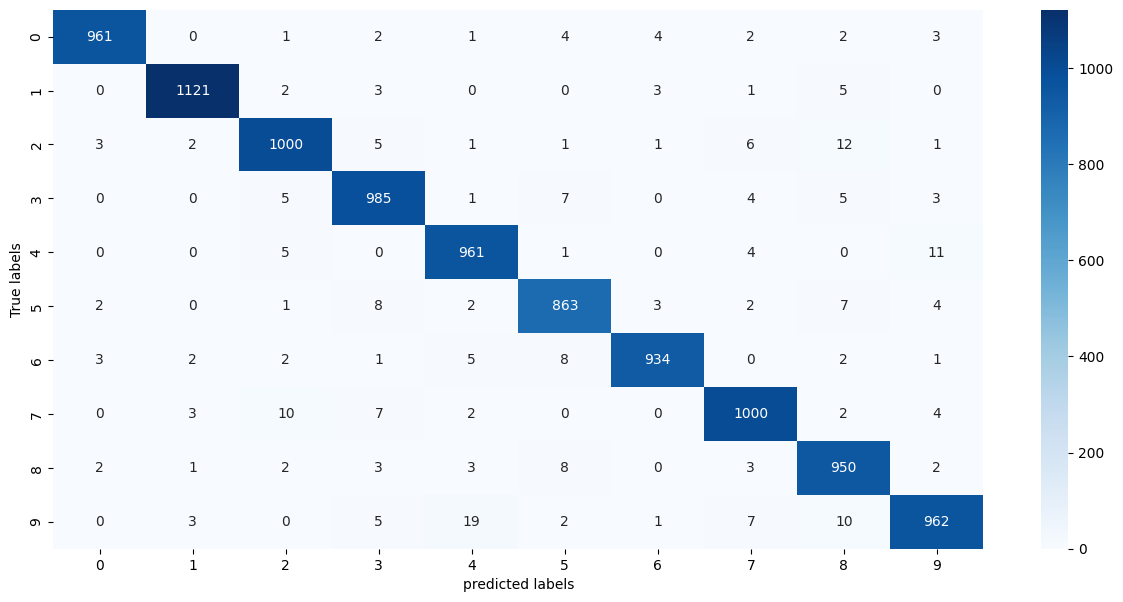

In [ ]:

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

Build a Predictive System.

In [ ]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [ ]:
# Load an image from a file
input_image = cv2.imread('/content/MNIST_digit.png')

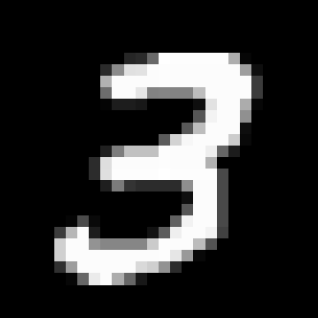

In [ ]:
cv2_imshow(input_image)

In [ ]:
  input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape


(318, 318)

In [ ]:

#Resize the input image.
resized_input_image = cv2.resize(grayscale, (28,28))
resized_input_image.shape

(28, 28)

In [ ]:
cv2_imshow(resized_input_image)


In [ ]:
resized_input_image = resized_input_image/255

In [ ]:
#Reshape the image.
image_reshape = np.reshape(resized_input_image, [1,28,28])


In [ ]:
prediction = model.predict(image_reshape)
prediction_label = np.argmax(prediction)
print(prediction_label)

1/1 [==============================] - 0s 90ms/step
3


Predictive Model

Enter the path of image/content/MNIST_digit.png


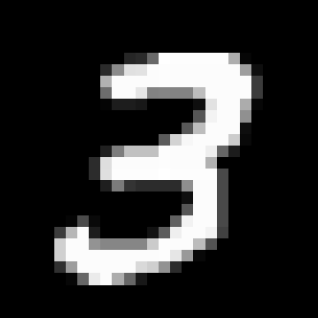

1/1 [==============================] - 0s 33ms/step
3


In [ ]:
input_image_path = input('Enter the path of image')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
resized_input_image = cv2.resize(grayscale, (28,28))
resized_input_image = resized_input_image/255
image_reshape = np.reshape(resized_input_image, [1,28,28])
prediction = model.predict(image_reshape)
prediction_label = np.argmax(prediction)
print(prediction_label)